In [45]:
import os
import glob
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# results_path = '/home/marcin/deep_q_rl/deep_q_rl/trained/breakout_2018-11-19_00-16-27_0p0002_0p95/results.csv'
# tf_logdir = './Deep_Q_Network/tf_log_2/breakout_prof/1'

results_path = '/home/marcin/atari_2013/enduro/prof/2/enduro_2018-11-25-01-29-40_0p0002_0p95/results.csv'
tf_logdir = '/home/marcin/atari_2013/enduro/prof/2'
#assert not os.path.exists(tf_logdir)
assert len(glob.glob(tf_logdir + '/*tfevents*')) == 0 # no files with 'tfevents' in name in that folder

results = np.loadtxt(open(results_path, "rb"), delimiter=",", skiprows=1)

In [46]:
results.shape

(100, 5)

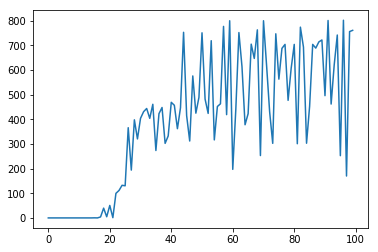

In [47]:
# Reward_Avg
plt.plot(results[:,3])

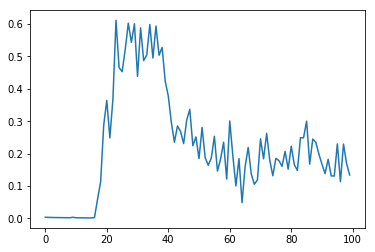

In [48]:
# Mean Q
plt.plot(results[:,4])

In [49]:
summary_writer = tf.summary.FileWriter(tf_logdir)
summary_writer.flush()

In [50]:
epoch_steps = 50000

In [51]:
for epoch, row in enumerate(results):
    summary = tf.Summary()
    summary.value.add(tag='Test/Reward_Avg', simple_value=results[epoch, 3])
    summary.value.add(tag='Test/Q_Average', simple_value=results[epoch, 4])
    summary_writer.add_summary(summary, results[epoch,0] * epoch_steps)
summary_writer.flush()